# Data Pipeline

#### Working from existing pipeline from previous progress reports

### Part 1: Webscraping news articles. Webscraping data pipeline [here](scraping_scripts.ipynb)

#### Install packages

In [1]:
from bs4 import BeautifulSoup
import urllib
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

### Part 2: Linguistic analysis of data

#### Starting with the Fox dataset

In [2]:
#reading in dataframe
fox_df = pd.read_csv('fox.csv')

In [3]:
import re

#'text' with 'click here' link removed
fox_df["text"] = fox_df.apply(lambda row: row["text"].replace(r"CLICK HERE [A-Z \.]*[A-Z]{2,}", ""), axis=1)

#'tokens' column with tokenized text
fox_df["tokens"] = fox_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'tokens' column with POS tags
fox_df["tokens_pos"] = fox_df.apply(lambda row: nltk.pos_tag(row["tokens"]), axis=1)

#'length' column with article length in words
fox_df["length"] = fox_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
fox_df["word_length"] = fox_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
fox_df["avg_word_length"] = fox_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
fox_df["freqdist"] = fox_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized (with POS tags)
fox_df["bigrams"] = fox_df.apply(lambda row: list(nltk.bigrams(row["tokens_pos"])), axis=1)

#sentences tokenized
fox_df["sentences"] = fox_df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)



In [4]:
fox_df.head()

,headline,text,Source,tokens,tokens_pos,length,word_length,avg_word_length,freqdist,bigrams,sentences
0,Musk spars with White House trade advisor Pete...,SpaceX and Tesla CEO Elon Musk sparred on soci...,Fox News,"[spacex, and, tesla, ceo, elon, musk, sparred,...","[(spacex, NN), (and, CC), (tesla, NN), (ceo, N...",606,"[6, 3, 5, 3, 4, 4, 7, 2, 6, 5, 7, 4, 5, 5, 6, ...",4.217822,"{'spacex': 1, 'and': 9, 'tesla': 3, 'ceo': 1, ...","[((spacex, NN), (and, CC)), ((and, CC), (tesla...",[SpaceX and Tesla CEO Elon Musk sparred on soc...
1,Gabbard establishes new intelligence community...,EXCLUSIVE: Director of National Intelligence T...,Fox News,"[exclusive, :, director, of, national, intelli...","[(exclusive, JJ), (:, :), (director, NN), (of,...",723,"[9, 1, 8, 2, 8, 12, 5, 7, 11, 1, 3, 4, 5, 7, 4...",5.199170,"{'exclusive': 1, ':': 2, 'director': 5, 'of': ...","[((exclusive, JJ), (:, :)), ((:, :), (director...",[EXCLUSIVE: Director of National Intelligence ...
2,Trump-backed bill to rein in federal judges ge...,The House of Representatives is expected to vo...,Fox News,"[the, house, of, representatives, is, expected...","[(the, DT), (house, NN), (of, IN), (representa...",534,"[3, 5, 2, 15, 2, 8, 2, 4, 7, 2, 1, 4, 2, 5, 7,...",4.453184,"{'the': 23, 'house': 8, 'of': 7, 'representati...","[((the, DT), (house, NN)), ((house, NN), (of, ...",[The House of Representatives is expected to v...
3,Pam Bondi warns migrant criminals 'we're comin...,Attorney General Pam Bondi warned illegal immi...,Fox News,"[attorney, general, pam, bondi, warned, illega...","[(attorney, NN), (general, JJ), (pam, NN), (bo...",451,"[8, 7, 3, 5, 6, 7, 9, 9, 2, 5, 7, 5, 4, 5, 3, ...",4.352550,"{'attorney': 1, 'general': 1, 'pam': 1, 'bondi...","[((attorney, NN), (general, JJ)), ((general, J...",[Attorney General Pam Bondi warned illegal imm...
4,Trump hauls in millions for House GOP 2026 war...,FIRST ON FOX — As congressional Republicans ge...,Fox News,"[first, on, fox, —, as, congressional, republi...","[(first, RB), (on, IN), (fox, NN), (—, NN), (a...",812,"[5, 2, 3, 1, 2, 13, 11, 4, 2, 3, 1, 8, 6, 2, 3...",4.433498,"{'first': 1, 'on': 6, 'fox': 4, '—': 1, 'as': ...","[((first, RB), (on, IN)), ((on, IN), (fox, NN)...",[FIRST ON FOX — As congressional Republicans g...


#### Creating list of all Fox News word tokens for further linguistic analysis

In [5]:
fox_all_toks = []
for i in range(len(fox_df)):
    fox_all_toks += fox_df["tokens"][i]
len(fox_all_toks)

20442

#### Adding POS tags to Fox tokens

In [6]:
fox_all_toks_pos = nltk.pos_tag(fox_all_toks)
fox_all_toks_pos[:10]

[('spacex', 'NN'),
 ('and', 'CC'),
 ('tesla', 'NN'),
 ('ceo', 'NN'),
 ('elon', 'NN'),
 ('musk', 'NN'),
 ('sparred', 'VBD'),
 ('on', 'IN'),
 ('social', 'JJ'),
 ('media', 'NNS')]

#### Creating list of all Fox News bigram tokens for further linguistic analysis

In [7]:
fox_all_bigrams = []
for i in range(len(fox_df)):
    fox_all_bigrams += fox_df["bigrams"][i]

#### Same procedure for the Fox Opinion articles

In [8]:
#reading in dataframe
fox_oped_df = pd.read_csv('fox_opinion.csv')

#'text' with 'click here' link removed
fox_df["text"] = fox_df.apply(lambda row: row["text"].replace(r"CLICK HERE [A-Z \.]*[A-Z]{2,}", ""), axis=1)

#'tokens' column with tokenized text
fox_oped_df["tokens"] = fox_oped_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'tokens' column with POS tags
fox_oped_df["tokens_pos"] = fox_oped_df.apply(lambda row: nltk.pos_tag(row["tokens"]), axis=1)

#'length' column with article length in words
fox_oped_df["length"] = fox_oped_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
fox_oped_df["word_length"] = fox_oped_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
fox_oped_df["avg_word_length"] = fox_oped_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
fox_oped_df["freqdist"] = fox_oped_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized (with POS tags)
fox_oped_df["bigrams"] = fox_oped_df.apply(lambda row: list(nltk.bigrams(row["tokens_pos"])), axis=1)

#sentences tokenized
fox_oped_df["sentences"] = fox_oped_df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)

In [9]:
fox_oped_df.head()

,headline,text,Source,tokens,tokens_pos,length,word_length,avg_word_length,freqdist,bigrams,sentences
0,Why 'toxic masculinity' is a dangerous and ter...,The idea of ‘toxic masculinity’ has been one o...,Fox News Opinion,"[the, idea, of, ‘, toxic, masculinity, ’, has,...","[(the, DT), (idea, NN), (of, IN), (‘, NNP), (t...",688,"[3, 4, 2, 1, 5, 11, 1, 3, 4, 3, 2, 3, 7, 6, 11...",3.776163,"{'the': 29, 'idea': 1, 'of': 13, '‘': 1, 'toxi...","[((the, DT), (idea, NN)), ((idea, NN), (of, IN...",[The idea of ‘toxic masculinity’ has been one ...
1,DAVID MARCUS: Democrats know 'judge shopping' ...,It is often said that a good baseball umpire g...,Fox News Opinion,"[it, is, often, said, that, a, good, baseball,...","[(it, PRP), (is, VBZ), (often, RB), (said, VBD...",1010,"[2, 2, 5, 4, 4, 1, 4, 8, 6, 4, 3, 3, 9, 5, 1, ...",4.279208,"{'it': 8, 'is': 18, 'often': 1, 'said': 2, 'th...","[((it, PRP), (is, VBZ)), ((is, VBZ), (often, R...",[It is often said that a good baseball umpire ...
2,MORNING GLORY: How the Senate and House find $...,"Hear me out, members (and staffs) of the House...",Fox News Opinion,"[hear, me, out, ,, members, (, and, staffs, ),...","[(hear, VB), (me, PRP), (out, RP), (,, ,), (me...",1460,"[4, 2, 3, 1, 7, 1, 3, 6, 1, 2, 3, 5, 4, 3, 5, ...",4.132192,"{'hear': 1, 'me': 1, 'out': 3, ',': 48, 'membe...","[((hear, VB), (me, PRP)), ((me, PRP), (out, RP...","[Hear me out, members (and staffs) of the Hous..."
3,SEN ELIZABETH WARREN: Social Security is under...,"Gutting Social Security isn’t ""efficient"" —&nb...",Fox News Opinion,"[gutting, social, security, isn, ’, t, ``, eff...","[(gutting, VBG), (social, JJ), (security, NN),...",1152,"[7, 6, 8, 3, 1, 1, 2, 9, 2, 1, 1, 4, 1, 2, 1, ...",4.168403,"{'gutting': 3, 'social': 23, 'security': 24, '...","[((gutting, VBG), (social, JJ)), ((social, JJ)...","[Gutting Social Security isn’t ""efficient"" —&n..."
4,LIZ PEEK: Cory Booker’s latest stunt could emb...,"Cory Booker, fresh off demonstrating that he i...",Fox News Opinion,"[cory, booker, ,, fresh, off, demonstrating, t...","[(cory, NN), (booker, NN), (,, ,), (fresh, JJ)...",1230,"[4, 6, 1, 5, 3, 13, 4, 2, 2, 7, 2, 5, 2, 5, 7,...",4.278049,"{'cory': 3, 'booker': 10, ',': 68, 'fresh': 1,...","[((cory, NN), (booker, NN)), ((booker, NN), (,...","[Cory Booker, fresh off demonstrating that he ..."


In [10]:
#creating list of all Fox Opinion tokens
fox_oped_all_toks = []
for i in range(len(fox_oped_df)):
    fox_oped_all_toks += fox_oped_df["tokens"][i]

#creating list of all Fox Opinion tokens with POS
fox_oped_all_toks_pos = nltk.pos_tag(fox_all_toks)

#creating list of all Fox Opinion bigrams
fox_oped_all_bigrams = []
for i in range(len(fox_oped_df)):
    fox_oped_all_bigrams += fox_oped_df["bigrams"][i]

In [11]:
len(fox_oped_all_toks), len(fox_oped_all_bigrams)

(25385, 25360)

#### Now for the Vox dataset

In [12]:
#reading in dataframe
vox_df = pd.read_csv('vox.csv')

In [13]:
#flattening 'text' column
vox_df["text"] = vox_df["text"].apply(eval).apply(' '.join)
vox_df.head()

,headline,subheading,text,Source
0,"Trump’s tariff-driven market crash, briefly ex...","The Dow has lost more than 4,000 points since ...","This story appeared in The Logoff, a daily new...",Vox
1,America may be headed for this rare type of ec...,"Stagflation, explained.",President Donald Trump’s decision to impose la...,Vox
2,Trump’s tariffs risk destroying his winning co...,"Already distrusted on the economy, Trump’s tar...",As markets tank and the prospect of higher pri...,Vox
3,How the Nintendo Switch 2 delay explains Trump...,Trump threw a blue shell at Nintendo — and the...,It was a big week for the global economy — and...,Vox
4,A conspiracy theorist convinced Trump to fire ...,"Laura Loomer, a 9/11 truther, apparently gets ...","This story appeared in The Logoff, a daily new...",Vox


In [14]:
#exporting flattened text dataframe to csv for later use (if needed)
vox_df.to_csv('vox_flat.csv', index=False)

In [15]:
#'tokens' column with tokenized text
vox_df["tokens"] = vox_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'tokens' column with POS tags
vox_df["tokens_pos"] = vox_df.apply(lambda row: nltk.pos_tag(row["tokens"]), axis=1)

#'length' column with article length in words
vox_df["length"] = vox_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
vox_df["word_length"] = vox_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
vox_df["avg_word_length"] = vox_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
vox_df["freqdist"] = vox_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized (with POS tags)
vox_df["bigrams"] = vox_df.apply(lambda row: list(nltk.bigrams(row["tokens_pos"])), axis=1)

#sentences tokenized
vox_df["sentences"] = vox_df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)

In [16]:
vox_df.head()

,headline,subheading,text,Source,tokens,tokens_pos,length,word_length,avg_word_length,freqdist,bigrams,sentences
0,"Trump’s tariff-driven market crash, briefly ex...","The Dow has lost more than 4,000 points since ...","This story appeared in The Logoff, a daily new...",Vox,"[this, story, appeared, in, the, logoff, ,, a,...","[(this, DT), (story, NN), (appeared, VBD), (in...",489,"[4, 5, 8, 2, 3, 6, 1, 1, 5, 10, 4, 5, 3, 4, 8,...",4.206544,"{'this': 5, 'story': 1, 'appeared': 1, 'in': 4...","[((this, DT), (story, NN)), ((story, NN), (app...","[This story appeared in The Logoff, a daily ne..."
1,America may be headed for this rare type of ec...,"Stagflation, explained.",President Donald Trump’s decision to impose la...,Vox,"[president, donald, trump, ’, s, decision, to,...","[(president, NN), (donald, NNS), (trump, VBP),...",1681,"[9, 6, 5, 1, 1, 8, 2, 6, 5, 7, 2, 3, 7, 7, 3, ...",4.453302,"{'president': 2, 'donald': 1, 'trump': 13, '’'...","[((president, NN), (donald, NNS)), ((donald, N...",[President Donald Trump’s decision to impose l...
2,Trump’s tariffs risk destroying his winning co...,"Already distrusted on the economy, Trump’s tar...",As markets tank and the prospect of higher pri...,Vox,"[as, markets, tank, and, the, prospect, of, hi...","[(as, IN), (markets, NNS), (tank, NN), (and, C...",767,"[2, 7, 4, 3, 3, 8, 2, 6, 6, 7, 4, 4, 1, 3, 6, ...",4.432855,"{'as': 6, 'markets': 1, 'tank': 1, 'and': 23, ...","[((as, IN), (markets, NNS)), ((markets, NNS), ...",[As markets tank and the prospect of higher pr...
3,How the Nintendo Switch 2 delay explains Trump...,Trump threw a blue shell at Nintendo — and the...,It was a big week for the global economy — and...,Vox,"[it, was, a, big, week, for, the, global, econ...","[(it, PRP), (was, VBD), (a, DT), (big, JJ), (w...",931,"[2, 3, 1, 3, 4, 3, 3, 6, 7, 1, 3, 3, 6, 1, 2, ...",4.250269,"{'it': 10, 'was': 3, 'a': 21, 'big': 1, 'week'...","[((it, PRP), (was, VBD)), ((was, VBD), (a, DT)...",[It was a big week for the global economy — an...
4,A conspiracy theorist convinced Trump to fire ...,"Laura Loomer, a 9/11 truther, apparently gets ...","This story appeared in The Logoff, a daily new...",Vox,"[this, story, appeared, in, the, logoff, ,, a,...","[(this, DT), (story, NN), (appeared, VBD), (in...",518,"[4, 5, 8, 2, 3, 6, 1, 1, 5, 10, 4, 5, 3, 4, 8,...",4.193050,"{'this': 4, 'story': 2, 'appeared': 1, 'in': 6...","[((this, DT), (story, NN)), ((story, NN), (app...","[This story appeared in The Logoff, a daily ne..."


#### Creating list of all Vox word tokens for further linguistic analysis

In [17]:
vox_all_toks = []
for i in range(len(vox_df)):
    vox_all_toks += vox_df["tokens"][i]
len(vox_all_toks)

31689

#### Adding POS tags to Vox tokens

In [18]:
vox_all_toks_pos = nltk.pos_tag(vox_all_toks)
vox_all_toks_pos[:10]

[('this', 'DT'),
 ('story', 'NN'),
 ('appeared', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('logoff', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('daily', 'JJ'),
 ('newsletter', 'NN')]

#### Creating list of all Vox bigram tokens for further linguistic analysis

In [19]:
vox_all_bigrams = []
for i in range(len(vox_df)):
    vox_all_bigrams += vox_df["bigrams"][i]
len(vox_all_bigrams)

31664

#### Same procedure for the Vox opinion (The Big Idea) articles

In [20]:
#reading in dataframe
vox_oped_df = pd.read_csv('vox_opinion.csv')

#flattening 'text' column
vox_oped_df["text"] = vox_oped_df["text"].apply(eval).apply(' '.join)

#'tokens' column with tokenized text
vox_oped_df["tokens"] = vox_oped_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'tokens' column with POS tags
vox_oped_df["tokens_pos"] = vox_oped_df.apply(lambda row: nltk.pos_tag(row["tokens"]), axis=1)

#'length' column with article length in words
vox_oped_df["length"] = vox_oped_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
vox_oped_df["word_length"] = vox_oped_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
vox_oped_df["avg_word_length"] = vox_oped_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
vox_oped_df["freqdist"] = vox_oped_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized
vox_oped_df["bigrams"] = vox_oped_df.apply(lambda row: list(nltk.bigrams(row["tokens"])), axis=1)

#bigrams tokenized (with POS tags)
vox_oped_df["bigrams"] = vox_oped_df.apply(lambda row: list(nltk.bigrams(row["tokens_pos"])), axis=1)

#sentences tokenized
fox_oped_df["sentences"] = fox_oped_df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)


In [21]:
vox_oped_df.head()

,headline,subheading,text,Source,tokens,tokens_pos,length,word_length,avg_word_length,freqdist,bigrams
0,Is it anti-Catholic to ask Amy Coney Barrett h...,President Trump’s nominee has written about ho...,"Twenty-two years ago Amy Coney Barrett, then a...",Vox The Big Idea,"[twenty-two, years, ago, amy, coney, barrett, ...","[(twenty-two, JJ), (years, NNS), (ago, RB), (a...",2373,"[10, 5, 3, 3, 5, 7, 1, 4, 1, 3, 5, 4, 2, 5, 3,...",4.506953,"{'twenty-two': 1, 'years': 1, 'ago': 1, 'amy':...","[((twenty-two, JJ), (years, NNS)), ((years, NN..."
1,The Putin paradox: he’s brutally repressive — ...,"We ignore history, and evidence, if we conclud...",It is perhaps a distinctly American faith that...,Vox The Big Idea,"[it, is, perhaps, a, distinctly, american, fai...","[(it, PRP), (is, VBZ), (perhaps, RB), (a, DT),...",1772,"[2, 2, 7, 1, 10, 8, 5, 4, 14, 4, 7, 9, 8, 5, 4...",4.422122,"{'it': 11, 'is': 20, 'perhaps': 1, 'a': 38, 'd...","[((it, PRP), (is, VBZ)), ((is, VBZ), (perhaps,..."
2,Online shopping is terrible for the environmen...,The environmental impact of online shopping on...,"With Black Friday, Cyber Monday, and the holid...",Vox The Big Idea,"[with, black, friday, ,, cyber, monday, ,, and...","[(with, IN), (black, JJ), (friday, NN), (,, ,)...",1439,"[4, 5, 6, 1, 5, 6, 1, 3, 3, 8, 5, 6, 3, 6, 1, ...",4.530229,"{'with': 9, 'black': 1, 'friday': 1, ',': 65, ...","[((with, IN), (black, JJ)), ((black, JJ), (fri..."
3,Why letting ex-felons vote probably won’t swin...,We analyzed ex-felons with voting rights. Thei...,Florida voters will soon decide whether to ret...,Vox The Big Idea,"[florida, voters, will, soon, decide, whether,...","[(florida, NN), (voters, NNS), (will, MD), (so...",1405,"[7, 6, 4, 4, 6, 7, 2, 6, 3, 5, 2, 4, 2, 6, 3, ...",4.617794,"{'florida': 13, 'voters': 5, 'will': 2, 'soon'...","[((florida, NN), (voters, NNS)), ((voters, NNS..."
4,"Trump’s birthright citizenship proposal, expla...",The faulty legal logic behind Trump’s birthrig...,President Donald Trump’s proposal to end birth...,Vox The Big Idea,"[president, donald, trump, ’, s, proposal, to,...","[(president, NN), (donald, NNS), (trump, VBP),...",1495,"[9, 6, 5, 1, 1, 8, 2, 3, 10, 11, 1, 1, 6, 4, 1...",4.496990,"{'president': 5, 'donald': 1, 'trump': 11, '’'...","[((president, NN), (donald, NNS)), ((donald, N..."


In [22]:
#creating list of all Vox opinion tokens
vox_oped_all_toks = []
for i in range(len(vox_oped_df)):
    vox_oped_all_toks += vox_oped_df["tokens"][i]

#creating list of all Vox opinion tokens with POS
vox_oped_all_toks_pos = nltk.pos_tag(vox_all_toks)

#creating list of all Vox opinion bigrams
vox_oped_all_bigrams = []
for i in range(len(vox_oped_df)):
    vox_oped_all_bigrams += vox_oped_df["bigrams"][i]

In [23]:
vox_oped_all_bigrams[:10]

[(('twenty-two', 'JJ'), ('years', 'NNS')),
 (('years', 'NNS'), ('ago', 'RB')),
 (('ago', 'RB'), ('amy', 'VBD')),
 (('amy', 'VBD'), ('coney', 'NN')),
 (('coney', 'NN'), ('barrett', 'NN')),
 (('barrett', 'NN'), (',', ',')),
 ((',', ','), ('then', 'RB')),
 (('then', 'RB'), ('a', 'DT')),
 (('a', 'DT'), ('law', 'NN')),
 (('law', 'NN'), ('clerk', 'NN'))]

In [24]:
len(vox_oped_all_toks), len(vox_oped_all_bigrams)

(48751, 48726)

#### Plotting token counts

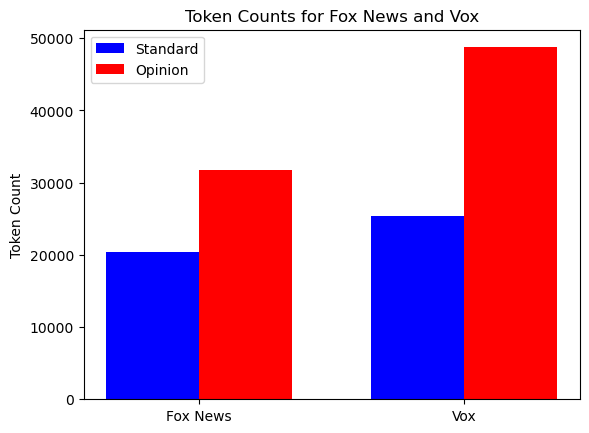

In [25]:
categories = ['Fox News', 'Vox']
vals1, vals2 = [len(fox_all_toks), len(fox_oped_all_toks)], [len(vox_all_toks), len(vox_oped_all_toks)]
width, x = 0.35, np.arange(len(categories))
fig, ax = plt.subplots()
ax.bar(x - width/2, vals1, width, label='Standard', color='blue')
ax.bar(x + width/2, vals2, width, label='Opinion', color='red')

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Token Count')
ax.set_title('Token Counts for Fox News and Vox')
ax.legend()
plt.show()

### Part 3: Unigram Analysis

#### First, re-introducing tokenized word lists for all Fox News and all Vox articles

In [26]:
len(fox_all_toks), len(vox_all_toks)

(20442, 31689)

#### Now for Fox News and Vox opinion articles

In [27]:
len(fox_oped_all_toks), len(vox_oped_all_toks)

(25385, 48751)

#### Creating frequency distributions for each word list

Frequency Distribution (with stopwords)

In [28]:
#With stopwords included

#Fox News frequency distribution
fox_freq = nltk.FreqDist(fox_all_toks)

#Fox Opinion frequency distribution
fox_oped_freq = nltk.FreqDist(fox_oped_all_toks)

#Vox frequency distribution
vox_freq = nltk.FreqDist(vox_all_toks)

#Vox The Big Idea frequency distribution
vox_oped_freq = nltk.FreqDist(vox_oped_all_toks)

Frequency Distribution adjusted to remove stopwords

In [29]:
#stopwords removed
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punct = ['.', '""', '``', '&', ',', ';', ':', "''", "'", '"', '(', ')', 'nbsp', 'click']

#Fox News frequency distribution (without stopwords)
fox_toks_ns = [word for word in fox_all_toks if word not in stopwords and word not in punct]
fox_freq_ns = nltk.FreqDist(fox_toks_ns)

#Fox Opinion frequency distribution (without stopwords)
fox_oped_toks_ns = [word for word in fox_oped_all_toks if word not in stopwords and word not in punct]
fox_oped_freq_ns = nltk.FreqDist(fox_oped_toks_ns)

#Vox frequency distribution (without stopwords)
vox_toks_ns = [word for word in vox_all_toks if word not in stopwords and word not in punct]
vox_freq_ns = nltk.FreqDist(vox_toks_ns)

#Vox The Big Idea frequency distribution (without stopwords)
vox_oped_toks_ns = [word for word in vox_oped_all_toks if word not in stopwords and word not in punct]
vox_oped_freq_ns = nltk.FreqDist(vox_oped_toks_ns)



#### Looking at the 100 most common words in each word list

In [30]:
#Fox News top 100 words
fox_top100 = fox_freq.most_common(100)
#Vox top 100 words
vox_top100 = vox_freq.most_common(100)
#Fox Opinion top 100 words
fox_oped_top100 = fox_oped_freq.most_common(100)
#Vox The Big Idea top 100 words
vox_oped_top100 = vox_oped_freq.most_common(100)

In [31]:
#viewing first 10 of most common 100 words (Fox News)
for i in fox_top100[:10]:
    print(i)

('the', 1076)
(',', 920)
('to', 645)
('.', 512)
('and', 400)
('``', 389)
('of', 379)
('a', 304)
('in', 300)
("''", 280)


In [32]:
#viewing first 10 of most common 100 words (Fox News Opinion)
for i in fox_oped_top100[:10]:
    print(i)

(',', 1071)
('the', 1034)
('.', 732)
(';', 689)
('&', 676)
('nbsp', 675)
('to', 628)
('and', 544)
('of', 482)
('a', 388)


In [33]:
#viewing first 10 of most common 100 words (Vox)
for i in vox_top100[:10]:
    print(i)

(',', 1481)
('the', 1419)
('.', 1154)
('to', 801)
('of', 678)
('’', 677)
('a', 639)
('and', 626)
('in', 536)
('that', 520)


In [34]:
#viewing first 10 of most common 100 words (Vox The Big Idea)
for i in vox_oped_top100[:10]:
    print(i)

('the', 2646)
(',', 2187)
('.', 1711)
('of', 1327)
('to', 1200)
('and', 962)
('a', 933)
('in', 793)
('that', 726)
('’', 598)


#### WordCloud Visualizations (stopwords removed)

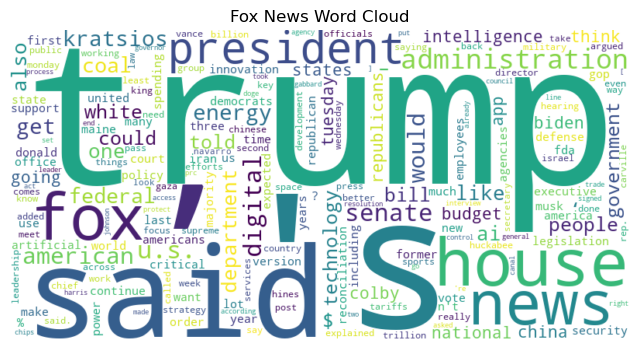

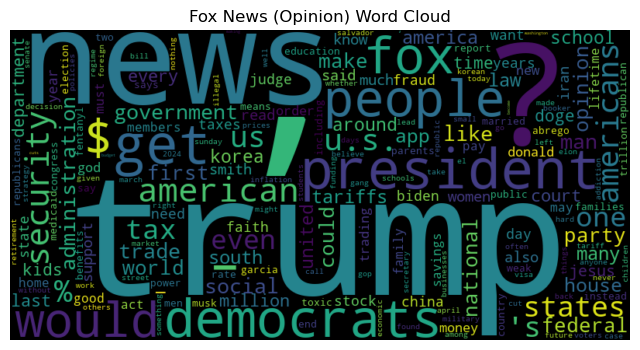

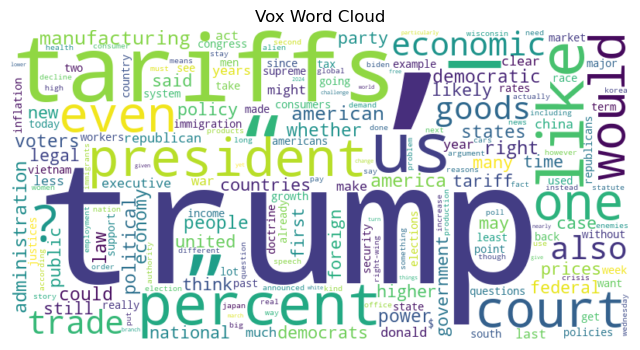

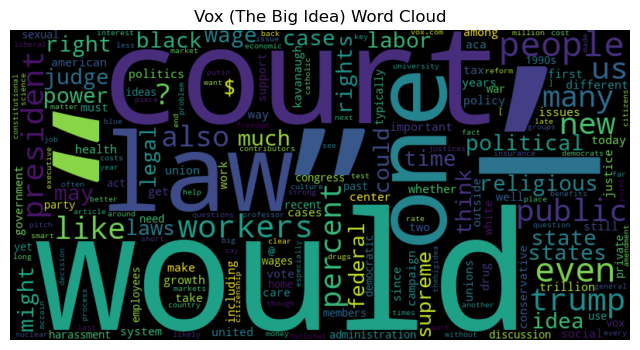

In [35]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Fox News word cloud
fox_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(fox_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fox News Word Cloud')
plt.show()

#Fox Opinion word cloud
fox_oped_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(fox_oped_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(fox_oped_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fox News (Opinion) Word Cloud')
plt.show()

#Vox word cloud
vox_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(vox_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vox Word Cloud')
plt.show()

#Vox (The Big Idea) word cloud
vox_oped_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(vox_oped_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(vox_oped_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vox (The Big Idea) Word Cloud')
plt.show()

### Part 4: Bigram Analysis

#### First, re-introducing tokenized bigram lists for all Fox News and all Vox articles

In [36]:
len(fox_all_bigrams), len(vox_all_bigrams)

(20417, 31664)

#### Same for the Fox Opinion and Vox (The Big Idea) articles

In [37]:
len(fox_oped_all_bigrams), len(vox_oped_all_bigrams)

(25360, 48726)

#### Finding bigram frequency distribution

In [38]:
#Fox News bigram frequency distribution
fox_bigrams_freq = nltk.FreqDist(fox_all_bigrams)
fox_bigrams_freq_mc = fox_bigrams_freq.most_common(100)

#Fox News Opinion bigram frequency distribution
fox_oped_bigrams_freq = nltk.FreqDist(fox_oped_all_bigrams)
fox_oped_bigrams_freq_mc = fox_oped_bigrams_freq.most_common(100)

#Vox bigram frequency distribution
vox_bigrams_freq = nltk.FreqDist(vox_all_bigrams)
vox_bigrams_freq_mc = vox_bigrams_freq.most_common(100)

#Vox (The Big Idea) bigram frequency distribution
vox_oped_bigrams_freq = nltk.FreqDist(vox_oped_all_bigrams)
vox_oped_bigrams_freq_mc = vox_oped_bigrams_freq.most_common(100)

print("Fox News bigram frequency distribution (top 100):", dict(fox_bigrams_freq_mc[:10]))
print("Fox News Opinion bigram frequency distribution (top 100):", dict(fox_oped_bigrams_freq_mc[:10]))
print("Vox bigram frequency distribution (top 100):", dict(vox_bigrams_freq_mc[:10]))
print("Vox (The Big Idea) bigram frequency distribution (top 100):", dict(vox_oped_bigrams_freq_mc[:10]))

Fox News bigram frequency distribution (top 100): {(('&', 'CC'), ('nbsp', 'NN')): 180, (('nbsp', 'NN'), (';', ':')): 180, (('.', '.'), ('``', '``')): 145, ((',', ','), ("''", "''")): 137, (('of', 'IN'), ('the', 'DT')): 88, ((',', ','), ('and', 'CC')): 80, (('fox', 'JJ'), ('news', 'NN')): 73, (('in', 'IN'), ('the', 'DT')): 72, (('to', 'TO'), ('the', 'DT')): 71, ((';', ':'), ('``', '``')): 62}
Fox News Opinion bigram frequency distribution (top 100): {(('&', 'CC'), ('nbsp', 'NN')): 462, (('nbsp', 'NN'), (';', ':')): 462, (('in', 'IN'), ('the', 'DT')): 84, ((',', ','), ('and', 'CC')): 76, (('of', 'IN'), ('the', 'DT')): 68, (('&', 'CC'), ('nbsp', 'RB')): 65, (('nbsp', 'RB'), (';', ':')): 65, ((',', ','), ('the', 'DT')): 63, (('click', 'NN'), ('here', 'RB')): 60, (('.', '.'), ('the', 'DT')): 58}
Vox bigram frequency distribution (top 100): {((',', ','), ('and', 'CC')): 159, (('’', 'NNP'), ('s', 'NN')): 155, (('in', 'IN'), ('the', 'DT')): 130, (('of', 'IN'), ('the', 'DT')): 121, ((',', ','),

#### Finding bigram conditional frequency distribution

In [39]:
#Fox News bigram conditional frequency distribution
fox_bigrams_cfd = nltk.ConditionalFreqDist(fox_all_bigrams)

#Fox News Opinion bigram conditional frequency distribution
fox_oped_bigrams_cfd = nltk.ConditionalFreqDist(fox_oped_all_bigrams)

#Vox bigram conditional frequency distribution
vox_bigrams_cfd = nltk.ConditionalFreqDist(vox_all_bigrams)

#Vox (The Big Idea) bigram conditional frequency distribution
vox_oped_bigrams_cfd = nltk.ConditionalFreqDist(vox_oped_all_bigrams)

#### Conditional Frequency Distribution for the word 'Trump' (top 50)

In [40]:
fox_trump = dict(fox_bigrams_cfd[('trump', 'NN')].most_common(50))
fox_oped_trump = dict(fox_oped_bigrams_cfd[('trump', 'NN')].most_common(50))
vox_trump = dict(vox_bigrams_cfd[('trump', 'NN')].most_common(50))
vox_oped_trump = dict(vox_oped_bigrams_cfd[('trump', 'NN')].most_common(50))
print(fox_trump)

{('administration', 'NN'): 29, ("'s", 'POS'): 27, ('’', 'NNP'): 9, ('is', 'VBZ'): 8, ('has', 'VBZ'): 8, ('could', 'MD'): 6, ('budget', 'NN'): 4, ('.', '.'): 4, ('wants', 'VBZ'): 3, ('said', 'VBD'): 3, ('was', 'VBD'): 2, ('signed', 'VBD'): 2, ('can', 'MD'): 2, ('nominee', 'NN'): 2, (',', ','): 2, ('defense', 'NN'): 2, ('publicly', 'RB'): 2, ('and', 'CC'): 2, ('to', 'TO'): 2, ('executive', 'NN'): 2, ('touts', 'VBZ'): 1, ('administration.', 'NN'): 1, ('promised', 'VBD'): 1, ('made', 'VBD'): 1, ('on', 'IN'): 1, ('understands', 'VBZ'): 1, ('carried', 'VBN'): 1, ('would', 'MD'): 1, ('‘', 'NNP'): 1, ('does', 'VBZ'): 1, (':', ':'): 1, ('himself', 'PRP'): 1, ('2024', 'CD'): 1}


In [41]:
#Fox News word cloud
'''fox_trump_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_trump)
plt.figure(figsize=(8, 6))
plt.imshow(fox_trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fox News: Most Common Words Following "Trump"')
plt.show()

#Fox Opinion word cloud
fox_oped_trump_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(fox_oped_trump)
plt.figure(figsize=(8, 6))
plt.imshow(fox_oped_trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fox News (Opinion): Most Common Words Following "Trump"')
plt.show()

#Vox word cloud
vox_trump_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_trump)
plt.figure(figsize=(8, 6))
plt.imshow(vox_trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vox Word Cloud: Most Common Words Following "Trump"')
plt.show()

#Vox (The Big Idea) word cloud
vox_oped_trump_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(vox_oped_trump)
plt.figure(figsize=(8, 6))
plt.imshow(vox_oped_trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vox (The Big Idea) Word Cloud: Most Common Words Following "Trump"')
plt.show()'''

'fox_trump_wordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate_from_frequencies(fox_trump)\nplt.figure(figsize=(8, 6))\nplt.imshow(fox_trump_wordcloud, interpolation=\'bilinear\')\nplt.axis(\'off\')\nplt.title(\'Fox News: Most Common Words Following "Trump"\')\nplt.show()\n\n#Fox Opinion word cloud\nfox_oped_trump_wordcloud = WordCloud(width=800, height=400, background_color=\'black\').generate_from_frequencies(fox_oped_trump)\nplt.figure(figsize=(8, 6))\nplt.imshow(fox_oped_trump_wordcloud, interpolation=\'bilinear\')\nplt.axis(\'off\')\nplt.title(\'Fox News (Opinion): Most Common Words Following "Trump"\')\nplt.show()\n\n#Vox word cloud\nvox_trump_wordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate_from_frequencies(vox_trump)\nplt.figure(figsize=(8, 6))\nplt.imshow(vox_trump_wordcloud, interpolation=\'bilinear\')\nplt.axis(\'off\')\nplt.title(\'Vox Word Cloud: Most Common Words Following "Trump"\')\nplt.show()\n\n#Vox (The B

### Part 5: Subjective Intensifiers

#### Uploading NLTK Brown Corpus and training bigram tagger

[NLTK POS Tagger Documentation](https://www.nltk.org/book/ch05.html#combining-taggers)

In [42]:
brown_sents = nltk.corpus.brown.tagged_sents()
brown_words = nltk.corpus.brown.tagged_words()


### CFD: Subjective intensifiers

Brown Corpus Subjective Intensifiers

In [43]:
brown_bigrams = list(nltk.bigrams(brown_words))
brown_bigrams[:10]

[(('The', 'AT'), ('Fulton', 'NP-TL')),
 (('Fulton', 'NP-TL'), ('County', 'NN-TL')),
 (('County', 'NN-TL'), ('Grand', 'JJ-TL')),
 (('Grand', 'JJ-TL'), ('Jury', 'NN-TL')),
 (('Jury', 'NN-TL'), ('said', 'VBD')),
 (('said', 'VBD'), ('Friday', 'NR')),
 (('Friday', 'NR'), ('an', 'AT')),
 (('an', 'AT'), ('investigation', 'NN')),
 (('investigation', 'NN'), ('of', 'IN')),
 (('of', 'IN'), ("Atlanta's", 'NP$'))]

In [44]:
brown_very = [(w2) for ((w1, p1), (w2, p2)) in brown_bigrams if w1=="very" and p2 == "JJ"]
brown_very_counts = nltk.FreqDist(brown_very)
brown_so = [(w2) for ((w1, p1), (w2, p2)) in brown_bigrams if w1=="so" and p2 == "JJ"]
brown_so_counts = nltk.FreqDist(brown_so)
brown_quite = [(w2) for ((w1, p1), (w2, p2)) in brown_bigrams if w1=="quite" and p2 == "JJ"]
brown_quite_counts = nltk.FreqDist(brown_quite)
brown_too = [(w2) for ((w1, p1), (w2, p2)) in brown_bigrams if w1=="too" and p2 == "JJ"]
brown_too_counts = nltk.FreqDist(brown_too)
print(brown_very[:10], brown_so[:10], brown_quite[:10], brown_too[:10])

['serious', 'modest', 'young', 'doubtful', 'playable', 'chic', 'debonair', 'real', 'short', 'encouraging'] ['quiet', 'long', 'quiet', 'slow', 'challenging', 'dense', 'eager', 'important', 'encouraging', 'dramatic'] ['cold', 'off-beat', 'able', 'lengthy', 'correct', 'evident', 'realistic', 'difficult', 'irresistible', 'believable'] ['conciliatory', 'trusting', 'light', 'dark', 'possessive', 'fat', 'hard', 'frantic', 'young', 'complete']


Text(0.5, 0.7, 'Brown Corpus Subjective Intensifier Bigrams')

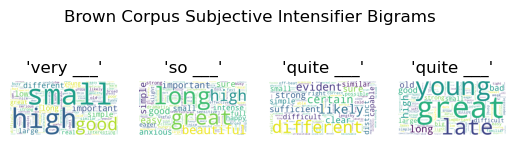

In [45]:
brown_very_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brown_very_counts)
brown_so_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brown_so_counts)
brown_quite_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brown_quite_counts)
brown_too_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brown_too_counts)

#very
plt.subplot(1, 4, 1)
plt.imshow(brown_very_wc)
plt.axis('off')
plt.title("'very ___'")

#so
plt.subplot(1, 4, 2)
plt.imshow(brown_so_wc)
plt.axis('off')
plt.title("'so ___'")

#quite
plt.subplot(1, 4, 3)
plt.imshow(brown_quite_wc)
plt.axis('off')
plt.title("'quite ___'")

#too
plt.subplot(1, 4, 4)
plt.imshow(brown_too_wc)
plt.axis('off')
plt.title("'quite ___'")

plt.suptitle('Brown Corpus Subjective Intensifier Bigrams', y=0.7)

Fox News Subjective Intensifiers

In [46]:
fox_very = [(w2) for ((w1, p1), (w2, p2)) in fox_all_bigrams if w1=="very" and p1=="RB" and p2 == "JJ"]
fox_very_counts = nltk.FreqDist(fox_very)
fox_so = [(w2) for ((w1, p1), (w2, p2)) in fox_all_bigrams if w1=="so" and p1=="RB" and p2 == "JJ"]
fox_so_counts = nltk.FreqDist(fox_so)
fox_quite = [(w2) for ((w1, p1), (w2, p2)) in fox_all_bigrams if w1=="quite" and p1=="RB" and p2 == "JJ"]
fox_quite_counts = nltk.FreqDist(fox_quite)
fox_too = [(w2) for ((w1, p1), (w2, p2)) in fox_all_bigrams if w1=="too" and p1=="RB" and p2 == "JJ"]
fox_too_counts = nltk.FreqDist(fox_too)
print(fox_very[:10], fox_so[:10], fox_quite[:10], fox_too[:10])

['reticent', 'clear', 'high-end', 'high-end', 'powerful', 'reticent', 'clear', 'high-end', 'high-end', 'clear'] ['crazy', 'controversial', 'important', 'i', 'many', 'low', 'many', 'many', 'correct', 'critical'] [] ['many', 'bad', 'much', 'much', 'little', 'much', 'little', 'much', 'much', 'slow']


Text(0.5, 0.7, 'Fox News Subjective Intensifier Bigrams')

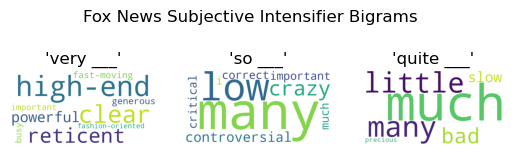

In [47]:

fox_very_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_very_counts)
fox_so_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_so_counts)
#No bigram values for 'quite' in Fox
#fox_quite_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_quite_counts)
fox_too_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_too_counts)

#very
plt.subplot(1, 3, 1)
plt.imshow(fox_very_wc)
plt.axis('off')
plt.title("'very ___'")

#so
plt.subplot(1, 3, 2)
plt.imshow(fox_so_wc)
plt.axis('off')
plt.title("'so ___'")

#too
plt.subplot(1, 3, 3)
plt.imshow(fox_too_wc)
plt.axis('off')
plt.title("'quite ___'")

plt.suptitle('Fox News Subjective Intensifier Bigrams', y=0.7)

Fox News Opinion Subjective Intensifiers

In [48]:
fox_oped_very = [(w2) for ((w1, p1), (w2, p2)) in fox_oped_all_bigrams if w1=="very" and p1=="RB" and p2 == "JJ"]
fox_oped_very_counts = nltk.FreqDist(fox_oped_very)
fox_oped_so = [(w2) for ((w1, p1), (w2, p2)) in fox_oped_all_bigrams if w1=="so" and p1=="RB" and p2 == "JJ"]
fox_oped_so_counts = nltk.FreqDist(fox_oped_so)
fox_oped_quite = [(w2) for ((w1, p1), (w2, p2)) in fox_oped_all_bigrams if w1=="quite" and p1=="RB" and p2 == "JJ"]
fox_oped_quite_counts = nltk.FreqDist(fox_oped_quite)
fox_oped_too = [(w2) for ((w1, p1), (w2, p2)) in fox_oped_all_bigrams if w1=="too" and p1=="RB" and p2 == "JJ"]
fox_oped_too_counts = nltk.FreqDist(fox_oped_too)
print(fox_oped_very[:10], fox_oped_so[:10], fox_oped_quite[:10], fox_oped_too[:10])

['difficult', 'positive', 'dangerous', 'high', 'high'] ['nobody', 'let', 'much', 'much', 'different'] [] ['high.']


Text(0.5, 0.7, 'Fox News (Opinion) Subjective Intensifier Bigrams')

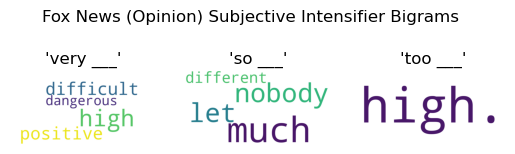

In [49]:
fox_oped_very_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_oped_very_counts)
fox_oped_so_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_oped_so_counts)
#No bigram values for 'quite' in Fox Opinion
#fox_oped_quite_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_oped_quite_counts)
fox_oped_too_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_oped_too_counts)

#very
plt.subplot(1, 3, 1)
plt.imshow(fox_oped_very_wc)
plt.axis('off')
plt.title("'very ___'")

#so
plt.subplot(1, 3, 2)
plt.imshow(fox_oped_so_wc)
plt.axis('off')
plt.title("'so ___'")

#too
plt.subplot(1, 3, 3)
plt.imshow(fox_oped_too_wc)
plt.axis('off')
plt.title("'too ___'")
plt.suptitle('Fox News (Opinion) Subjective Intensifier Bigrams', y=0.7)

Vox Subjective Intensifiers

In [50]:
vox_very = [(w2) for ((w1, p1), (w2, p2)) in vox_all_bigrams if w1=="very" and p1=="RB" and p2 == "JJ"]
vox_very_counts = nltk.FreqDist(vox_very)
vox_so = [(w2) for ((w1, p1), (w2, p2)) in vox_all_bigrams if w1=="so" and p1=="RB" and p2 == "JJ"]
vox_so_counts = nltk.FreqDist(vox_so)
vox_quite = [(w2) for ((w1, p1), (w2, p2)) in vox_all_bigrams if w1=="quite" and p1=="RB" and p2 == "JJ"]
vox_quite_counts = nltk.FreqDist(vox_quite)
vox_too = [(w2) for ((w1, p1), (w2, p2)) in vox_all_bigrams if w1=="too" and p1=="RB" and p2 == "JJ"]
vox_too_counts = nltk.FreqDist(vox_too)
print(vox_very[:10], vox_so[:10], vox_quite[:10], vox_too[:10])

['positive', 'tight', 'keen', 'clear', 'strange', 'fractious', 'different', 'broad', 'real', 'high'] ['i', 'undeniable', 'partisan', 'surprising', 'old', 'different', 'many', 'broad', 'low', 'many'] ['damaging', 'rare', 'unclear', 'broad', 'broad', 'extraordinary.', 'clear'] ['ambitious', 'much', 'ambitious', 'big', 'much', 'late', 'hard', 'many', 'early']


Text(0.5, 0.7, 'Vox Subjective Intensifier Bigrams')

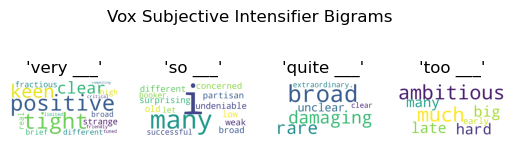

In [51]:
vox_very_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_very_counts)
vox_so_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_so_counts)
vox_quite_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_quite_counts)
vox_too_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_too_counts)

#very
plt.subplot(1, 4, 1)
plt.imshow(vox_very_wc)
plt.axis('off')
plt.title("'very ___'")

#so
plt.subplot(1, 4, 2)
plt.imshow(vox_so_wc)
plt.axis('off')
plt.title("'so ___'")

#quite
plt.subplot(1, 4, 3)
plt.imshow(vox_quite_wc)
plt.axis('off')
plt.title("'quite ___'")

#too
plt.subplot(1, 4, 4)
plt.imshow(vox_too_wc)
plt.axis('off')
plt.title("'too ___'")
plt.suptitle('Vox Subjective Intensifier Bigrams', y=0.7)

Vox (The Big Idea) Subjective Intensifiers

In [52]:
vox_oped_very = [(w2) for ((w1, p1), (w2, p2)) in vox_oped_all_bigrams if w1=="very" and p1=="RB" and p2 == "JJ"]
vox_oped_very_counts = nltk.FreqDist(vox_oped_very)
vox_oped_so = [(w2) for ((w1, p1), (w2, p2)) in vox_oped_all_bigrams if w1=="so" and p1=="RB" and p2 == "JJ"]
vox_oped_so_counts = nltk.FreqDist(vox_oped_so)
vox_oped_quite = [(w2) for ((w1, p1), (w2, p2)) in vox_oped_all_bigrams if w1=="quite" and p1=="RB" and p2 == "JJ"]
vox_oped_quite_counts = nltk.FreqDist(vox_oped_quite)
vox_oped_too = [(w2) for ((w1, p1), (w2, p2)) in vox_oped_all_bigrams if w1=="too" and p1=="RB" and p2 == "JJ"]
vox_oped_too_counts = nltk.FreqDist(vox_oped_too)
print(vox_oped_very[:10], vox_oped_so[:10], vox_oped_quite[:10], vox_oped_too[:10])

['important', 'diverse', 'much', 'difficult', 'difficult', 'specific', 'common', 'few', 'likely', 'real'] ['wrong', 'prominent', 'much', 'stacked', 'i', 'strong', 'difficult', 'easy', 'many', 'bold'] ['strong', 'nonreligious', 'serious', 'broad', 'protective', 'adamant', 'sympathetic', 'broad', 'helpful'] ['surprising', 'high', 'favorable', 'convenient', 'hard', 'much', 'much', 'much', 'many', 'low']


Text(0.5, 0.7, 'Vox (The Big Idea) Subjective Intensifier Bigrams')

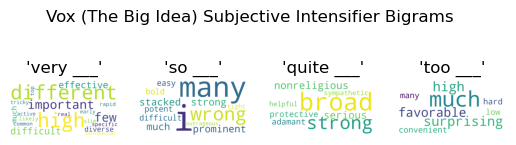

In [53]:
vox_oped_very_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_oped_very_counts)
vox_oped_so_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_oped_so_counts)
vox_oped_quite_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_oped_quite_counts)
vox_oped_too_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_oped_too_counts)

#very
plt.subplot(1, 4, 1)
plt.imshow(vox_oped_very_wc)
plt.axis('off')
plt.title("'very ___'")

#so
plt.subplot(1, 4, 2)
plt.imshow(vox_oped_so_wc)
plt.axis('off')
plt.title("'so ___'")

#quite
plt.subplot(1, 4, 3)
plt.imshow(vox_oped_quite_wc)
plt.axis('off')
plt.title("'quite ___'")

#too
plt.subplot(1, 4, 4)
plt.imshow(vox_oped_too_wc)
plt.axis('off')
plt.title("'too ___'")
plt.suptitle('Vox (The Big Idea) Subjective Intensifier Bigrams', y=0.7)

#### Frequency Analysis of Subjective Intensifier Bigrams

In [54]:
fox_si_all = len(fox_very) + len(fox_so) + len(fox_quite) + len(fox_too)
fox_oped_si_all = len(fox_oped_very) + len(fox_oped_so) + len(fox_oped_quite) + len(fox_oped_too)
vox_si_all = len(vox_very) + len(vox_so) + len(vox_quite) + len(vox_too)
vox_oped_si_all = len(vox_oped_very) + len(vox_oped_so) + len(vox_oped_quite) + len(vox_oped_too)
brown_si_all = len(brown_very) + len(brown_so) + len(brown_quite) + len(brown_too)

fox_si_all, fox_oped_si_all, vox_si_all, vox_oped_si_all, brown_si_all


(40, 11, 48, 70, 1154)

### Part 6: Final comparison of subjective intensifier data

Fox News subjective intensifiers to all tokens proportion

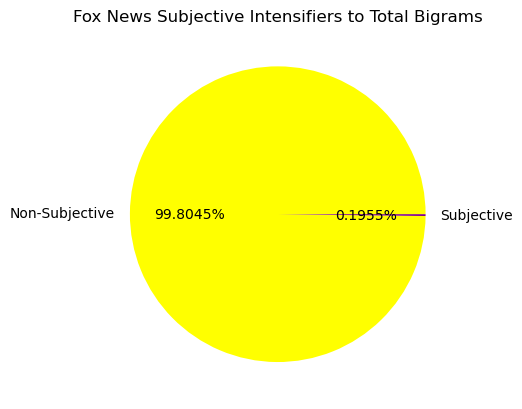

In [55]:
plt.pie(x=[len(fox_all_bigrams), fox_si_all], labels=['Non-Subjective', 'Subjective'], colors=['yellow', 'purple'], autopct='%1.4f%%')
plt.title('Fox News Subjective Intensifiers to Total Bigrams')
plt.show()

Fox News Opinion subjective intensifiers to all tokens proportion

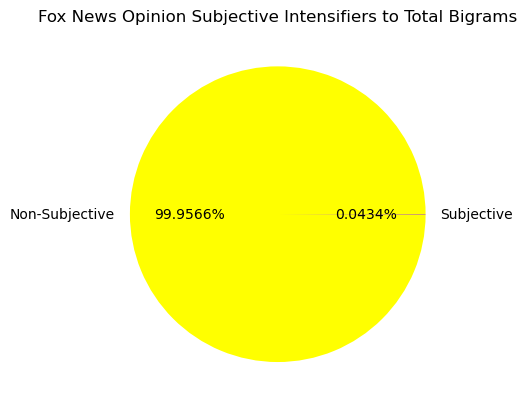

In [56]:
plt.pie(x=[len(fox_oped_all_bigrams), fox_oped_si_all], labels=['Non-Subjective', 'Subjective'], colors=['yellow', 'purple'], autopct='%1.4f%%')
plt.title('Fox News Opinion Subjective Intensifiers to Total Bigrams')
plt.show()

Vox subjective intensifiers to all tokens proportion

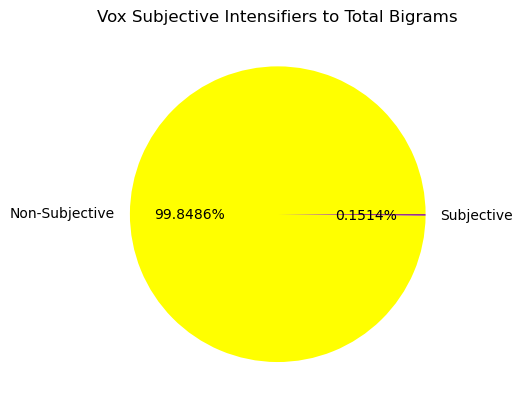

In [57]:
plt.pie(x=[len(vox_all_bigrams), vox_si_all], labels=['Non-Subjective', 'Subjective'], colors=['yellow', 'purple'], autopct='%1.4f%%')
plt.title('Vox Subjective Intensifiers to Total Bigrams')
plt.show()

Vox Opinion (The Big Idea) subjective intensifiers to all tokens proportion

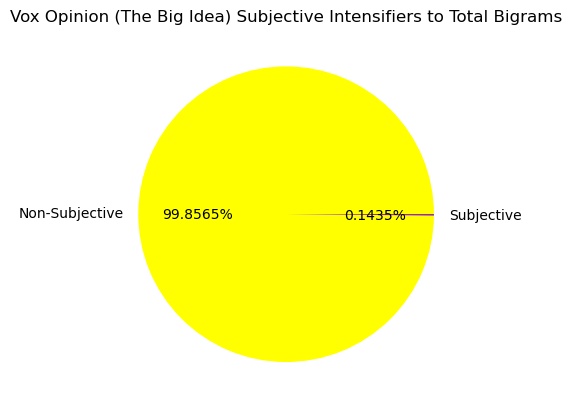

In [58]:
plt.pie(x=[len(vox_oped_all_bigrams), vox_oped_si_all], labels=['Non-Subjective', 'Subjective'], colors=['yellow', 'purple'], autopct='%1.4f%%')
plt.title('Vox Opinion (The Big Idea) Subjective Intensifiers to Total Bigrams')
plt.show()